In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Read each CSV file
train_df = pd.read_csv(os.path.join('../Data', "train_data.csv"))
undersampled_train_df = pd.read_csv(os.path.join('../Data', "undersampled_train_data.csv"))
oversampled_train_df = pd.read_csv(os.path.join('../Data', "oversampled_train_data.csv"))
extracted_features_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_train_data.csv"))
extracted_features_undersampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_undersampled_train_data.csv"))
extracted_features_oversampled_train_df = pd.read_csv(os.path.join('../Data', "extracted_features_oversampled_train_data.csv"))
test_df = pd.read_csv(os.path.join('../Data', "test_data.csv"))

In [3]:
N_SPLITS = 3

# Apply on the original data

In [4]:
X_train = train_df.drop('Class', axis=1).values
y_train = train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [5]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.476503,0.210223,0.080477,0.008089,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.967036,0.976733,0.979873,0.974547,0.005464,16,0.995204,0.993824,0.990771,0.993266,1.852217e-03
1,2.771729,0.062945,0.100531,0.012476,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.978349,0.973654,0.985133,0.979046,0.004712,8,0.998594,0.996855,0.998078,0.997842,7.293214e-04
2,1.109661,0.065553,0.062529,0.006288,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.979798,0.973913,0.982601,0.978771,0.003620,11,0.991369,0.989759,0.990641,0.990590,6.584245e-04
3,2.241422,0.210857,0.092962,0.008627,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.981197,0.974479,0.983687,0.979787,0.003889,6,0.996340,0.994431,0.994572,0.995114,8.683079e-04
4,1.534855,0.248499,0.076685,0.002089,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.969222,0.977785,0.978196,0.975067,0.004137,15,0.998021,0.998258,0.998367,0.998215,1.442198e-04
5,2.699837,0.134475,0.105559,0.005394,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.978188,0.971519,0.986821,0.978843,0.006264,10,0.999634,0.999519,0.999681,0.999611,6.815227e-05
6,1.168051,0.173119,0.063534,0.002583,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.976704,0.972403,0.981782,0.976963,0.003833,14,0.993820,0.992292,0.992477,0.992863,6.811262e-04
7,2.079810,0.221515,0.099612,0.015594,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.979427,0.976036,0.984050,0.979838,0.003285,5,0.996834,0.995484,0.995036,0.995785,7.642925e-04
8,1.187854,0.183740,0.060269,0.003155,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.972592,0.968701,0.992843,0.978045,0.010583,13,0.999999,0.999999,0.999997,0.999998,8.984419e-07
9,2.000172,0.039379,0.123566,0.046466,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.975198,0.970709,0.991061,0.978989,0.008731,9,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [6]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9818697526637203
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [7]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9818697526637203 with parameters {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200}


In [8]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
original_best_xgb_model = xgb.fit(X_train, y_train)
y_train_pred = original_best_xgb_model.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227451      0]
 [     0    394]]


In [10]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 1.0
Percision: 1.0
F1-Score: 1.0
Accuracy: 1.0
Specificity: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [11]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

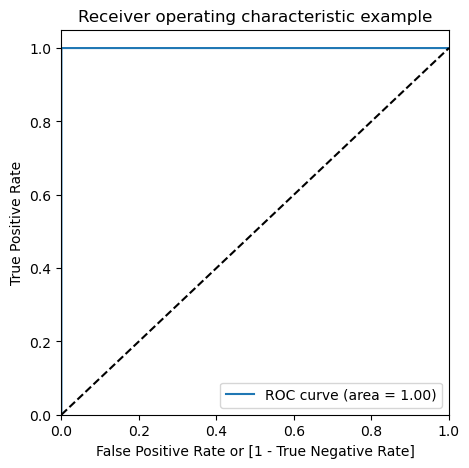

In [12]:
# Predicted probability
y_train_pred_proba = original_best_xgb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [13]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_xgb_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9995
test_precision: 0.9323
test_recall: 0.7691
test_f1: 0.8425
test_roc_auc: 0.9819


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the original data

In [14]:
X_train = extracted_features_train_df.drop('Class', axis=1).values
y_train = extracted_features_train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:40:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [15]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.563049,0.006222,0.050102,0.011122,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.968482,0.973822,0.980300,0.974201,0.004832,13,0.994726,0.991504,0.989884,0.992038,2.012490e-03
1,1.088732,0.011532,0.072921,0.014739,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.966488,0.971374,0.984781,0.974214,0.007733,12,0.997805,0.996343,0.995399,0.996516,9.899799e-04
2,0.554106,0.011614,0.061373,0.001576,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.964437,0.968315,0.986038,0.972930,0.009403,15,0.992723,0.988447,0.987996,0.989722,2.130166e-03
3,0.970527,0.058270,0.082578,0.008802,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.965406,0.972386,0.985682,0.974492,0.008410,11,0.995006,0.991682,0.991164,0.992617,1.702085e-03
4,0.604911,0.060470,0.066168,0.017695,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.970005,0.965517,0.979656,0.971726,0.005899,16,0.998359,0.995877,0.995417,0.996551,1.292119e-03
5,1.095130,0.074103,0.095308,0.015783,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.967989,0.977687,0.983182,0.976286,0.006281,9,0.999443,0.998759,0.998496,0.998899,3.989843e-04
6,0.441638,0.010257,0.049718,0.003150,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.964925,0.968943,0.985247,0.973038,0.008787,14,0.993537,0.989611,0.988755,0.990634,2.081876e-03
7,0.821164,0.025657,0.070034,0.006256,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.965129,0.975327,0.984698,0.975051,0.007991,10,0.995643,0.992730,0.991518,0.993297,1.731233e-03
8,0.439317,0.014025,0.052802,0.004320,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.960084,0.978587,0.990962,0.976544,0.012688,8,0.999825,0.999656,0.999889,0.999790,9.840444e-05
9,0.790543,0.031361,0.080293,0.003813,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.965749,0.976412,0.990715,0.977626,0.010228,7,0.999999,0.999999,0.999999,0.999999,6.544271e-08


In [16]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9817078152517551
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [17]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9817078152517551 with parameters {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}


In [18]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
original_best_xgb_model_v2 = xgb.fit(X_train, y_train)
y_train_pred = original_best_xgb_model_v2.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221534      8]
 [    67    327]]


In [20]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.8299492385786802
Percision: 0.9761194029850746
F1-Score: 0.897119341563786
Accuracy: 0.9996620647393843
Specificity: 0.9999638894656544
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221542
           1       0.98      0.83      0.90       394

    accuracy                           1.00    221936
   macro avg       0.99      0.91      0.95    221936
weighted avg       1.00      1.00      1.00    221936



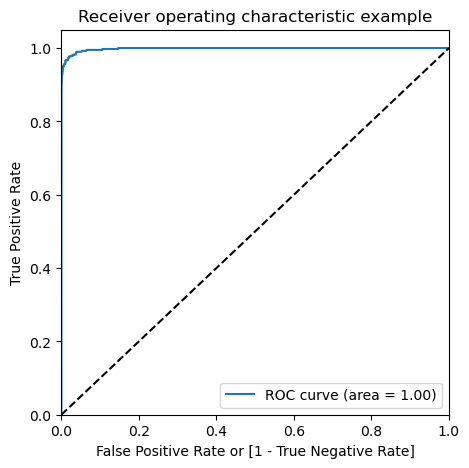

In [21]:
# Predicted probability
y_train_pred_proba = original_best_xgb_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [22]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(original_best_xgb_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9996
test_precision: 0.9658
test_recall: 0.7843
test_f1: 0.8653
test_roc_auc: 0.9817


# Apply on the under-sampled data

In [23]:
X_train = undersampled_train_df.drop('Class', axis=1).values
y_train = undersampled_train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.146376,0.009657,0.000000,0.000000,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.979239,0.975567,0.984791,0.979866,0.003792,15,0.999739,0.998200,0.999733,0.999224,0.000724
1,0.264404,0.001235,0.005797,0.006989,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.975133,0.979586,0.985782,0.980167,0.004367,14,0.999956,0.999753,0.999942,0.999884,0.000093
2,0.090602,0.004450,0.005209,0.007367,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.975451,0.979355,0.987093,0.980633,0.004838,9,0.995799,0.994442,0.995186,0.995142,0.000555
3,0.174382,0.013245,0.000000,0.000000,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.971837,0.983692,0.988637,0.981389,0.007049,7,0.997526,0.996909,0.997311,0.997248,0.000256
4,0.191693,0.005901,0.000000,0.000000,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.977851,0.971895,0.983917,0.977888,0.004908,16,0.999855,0.999347,0.999769,0.999657,0.000222
5,0.350372,0.006376,0.010412,0.007362,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.976058,0.979586,0.985665,0.980436,0.003968,13,0.999971,0.999927,0.999971,0.999956,0.000021
6,0.107265,0.001926,0.000000,0.000000,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.975451,0.979355,0.987093,0.980633,0.004838,9,0.995799,0.994442,0.995244,0.995161,0.000557
7,0.182822,0.007767,0.000000,0.000000,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.971837,0.983692,0.988579,0.981369,0.007029,8,0.997526,0.996909,0.997325,0.997253,0.000257
8,0.104888,0.008126,0.000000,0.000000,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.976058,0.980396,0.991959,0.982804,0.006711,1,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.149070,0.010414,0.005208,0.007366,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.975133,0.980511,0.991959,0.982534,0.007016,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [25]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9828041206894419
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


In [26]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9828041206894419 with parameters {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}


In [27]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
undersampled_best_xgb_model = xgb.fit(X_train, y_train)
y_train_pred = undersampled_best_xgb_model.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[394   0]
 [  0 394]]


In [29]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 1.0
Percision: 1.0
F1-Score: 1.0
Accuracy: 1.0
Specificity: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788



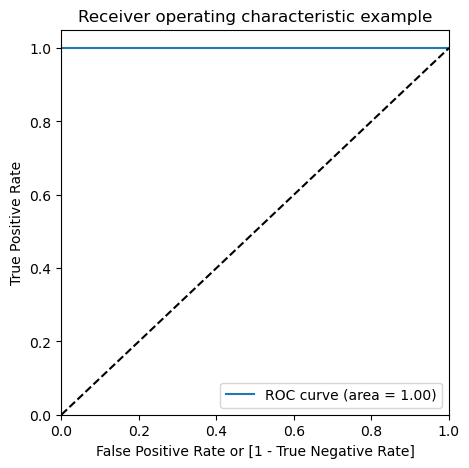

In [30]:
# Predicted probability
y_train_pred_proba = undersampled_best_xgb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [31]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_xgb_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9518
test_precision: 0.9741
test_recall: 0.9290
test_f1: 0.9506
test_roc_auc: 0.9828


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the undersampled data

In [32]:
X_train = extracted_features_undersampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_undersampled_train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [33]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.068276,0.008584,0.000000,0.000000,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.969283,0.979753,0.982586,0.977207,0.005722,15,0.998800,0.997653,0.997720,0.998058,0.000525
1,0.140831,0.003161,0.000465,0.000657,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.967862,0.983152,0.984435,0.978483,0.007528,13,0.999538,0.999339,0.998886,0.999254,0.000273
2,0.046877,0.000002,0.015625,0.000002,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.972804,0.982228,0.986134,0.980389,0.005595,9,0.994573,0.991920,0.991111,0.992535,0.001479
3,0.096737,0.004224,0.010416,0.007365,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.967921,0.983987,0.987476,0.979795,0.008516,12,0.996675,0.994787,0.994178,0.995213,0.001063
4,0.093751,0.000004,0.000000,0.000000,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.969194,0.975757,0.981930,0.975627,0.005200,16,0.999433,0.997980,0.998247,0.998554,0.000632
5,0.160537,0.008096,0.000000,0.000000,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.968040,0.980916,0.983540,0.977499,0.006774,14,0.999896,0.999384,0.999376,0.999552,0.000243
6,0.057292,0.007366,0.005208,0.007365,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.972804,0.982228,0.986134,0.980389,0.005595,9,0.994573,0.991920,0.991111,0.992535,0.001479
7,0.110886,0.002137,0.000000,0.000000,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.967921,0.983987,0.987655,0.979855,0.008570,11,0.996675,0.994787,0.994118,0.995193,0.001083
8,0.063624,0.001590,0.000000,0.000000,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.971946,0.982646,0.988967,0.981186,0.007025,6,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.095799,0.002889,0.010412,0.007362,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.973071,0.982049,0.988430,0.981183,0.006300,7,1.000000,1.000000,1.000000,1.000000,0.000000


In [34]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9835631180603747
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [35]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9835631180603747 with parameters {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200}


In [36]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
undersampled_best_xgb_model_v2 = xgb.fit(X_train, y_train)
y_train_pred = undersampled_best_xgb_model_v2.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[383   1]
 [ 10 384]]


In [38]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 0.9746192893401016
Percision: 0.9974025974025974
F1-Score: 0.9858793324775353
Accuracy: 0.9858611825192802
Specificity: 0.9973958333333334
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       384
           1       1.00      0.97      0.99       394

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778



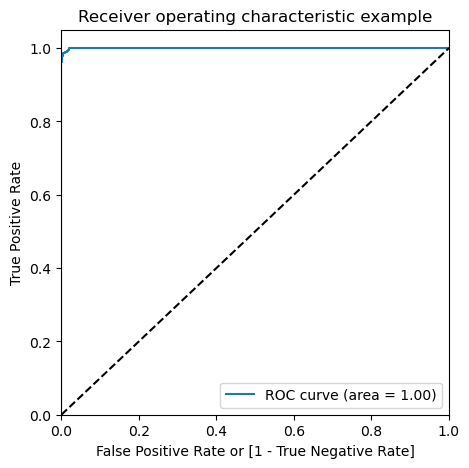

In [39]:
# Predicted probability
y_train_pred_proba = undersampled_best_xgb_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [40]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(undersampled_best_xgb_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9435
test_precision: 0.9607
test_recall: 0.9264
test_f1: 0.9430
test_roc_auc: 0.9836


# Apply on the over-sampled data

In [41]:
X_train = oversampled_train_df.drop('Class', axis=1).values
y_train = oversampled_train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:41:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [42]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.433255,0.008822,0.113119,0.008585,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.996407,0.995899,0.996050,0.996119,0.000213,15,0.996169,0.996269,0.996281,0.996240,4.998451e-05
1,4.004978,0.084681,0.158449,0.000405,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.997849,0.997485,0.997678,0.997671,0.000149,14,0.997694,0.997781,0.997798,0.997758,4.529399e-05
2,2.200860,0.018849,0.107041,0.002082,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.996426,0.995871,0.996058,0.996119,0.000231,16,0.996184,0.996254,0.996281,0.996240,4.085370e-05
3,3.959351,0.036025,0.151722,0.000865,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.997870,0.997480,0.997676,0.997675,0.000159,13,0.997720,0.997778,0.997795,0.997764,3.225283e-05
4,5.579452,0.056088,0.160891,0.002127,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999772,0.999658,0.999672,0.999701,0.000051,11,0.999748,0.999811,0.999729,0.999763,3.514648e-05
5,10.289448,0.253037,0.262656,0.003297,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999877,0.999765,0.999860,0.999834,0.000049,9,0.999845,0.999886,0.999846,0.999859,1.928978e-05
6,5.125877,0.068385,0.162874,0.005203,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999741,0.999642,0.999670,0.999684,0.000042,12,0.999729,0.999792,0.999718,0.999747,3.250845e-05
7,9.379844,0.137200,0.266584,0.001381,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999855,0.999755,0.999854,0.999821,0.000047,10,0.999824,0.999875,0.999834,0.999844,2.203213e-05
8,2.117991,0.037803,0.116793,0.000311,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.999867,0.999805,0.999880,0.999850,0.000033,8,0.999879,0.999891,0.999895,0.999888,6.963925e-06
9,3.811046,0.042950,0.161490,0.002763,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.999987,0.999946,0.999972,0.999968,0.000017,6,0.999992,0.999994,0.999995,0.999994,1.145208e-06


In [43]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9999864419998925
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [44]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9999864419998925 with parameters {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200}


In [45]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
oversampled_best_xgb_model = xgb.fit(X_train, y_train)
y_train_pred = oversampled_best_xgb_model.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:45:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[227447      4]
 [     0 227451]]


In [47]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 1.0
Percision: 0.9999824141038887
F1-Score: 0.9999912069746277
Accuracy: 0.9999912068973098
Specificity: 0.9999824137946195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



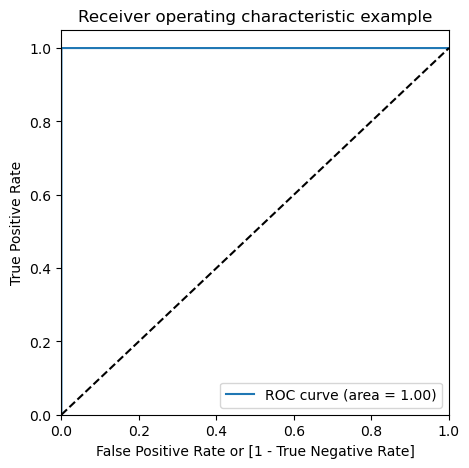

In [48]:
# Predicted probability
y_train_pred_proba = oversampled_best_xgb_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [49]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_xgb_model, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9997
test_precision: 0.9993
test_recall: 1.0000
test_f1: 0.9997
test_roc_auc: 1.0000


### Consider the most important features only (V3, V4, V7, V10, V12,V14, V16, V17, V18) on the oversampled data

In [50]:
X_train = extracted_features_oversampled_train_df.drop('Class', axis=1).values
y_train = extracted_features_oversampled_train_df['Class'].values

# Define hyperparameter grid for XGBoost
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 5]
}

# Set up GridSearchCV with XGBoost
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42),
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=N_SPLITS,
    verbose=1,
    return_train_score=True
)

# Fit the model
grid_xgb.fit(X_train, y_train)

# Get the best estimator
xgb_model = grid_xgb.best_estimator_

print("Best Estimator: ", xgb_model)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:46:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [51]:
# results of grid search CV
cv_results = pd.DataFrame(grid_xgb.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.260525,0.033266,0.097069,0.004692,0.01,5,1,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.994109,0.993666,0.993817,0.993864,0.000184,16,0.993846,0.994068,0.993984,0.993966,9.124061e-05
1,2.198387,0.104631,0.146517,0.004267,0.01,5,1,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.995454,0.995169,0.995242,0.995288,0.000121,14,0.995280,0.995499,0.995391,0.995390,8.955174e-05
2,1.136102,0.026985,0.097423,0.001685,0.01,5,5,100,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.994121,0.993680,0.993832,0.993878,0.000183,15,0.993863,0.994080,0.994004,0.993982,8.996655e-05
3,2.089033,0.020430,0.144434,0.003285,0.01,5,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'min_c...",0.995455,0.995168,0.995281,0.995302,0.000118,13,0.995281,0.995498,0.995425,0.995401,9.024039e-05
4,2.451788,0.009008,0.147878,0.004206,0.01,10,1,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999441,0.999360,0.999364,0.999388,0.000037,9,0.999531,0.999549,0.999524,0.999535,1.072781e-05
5,4.667993,0.091732,0.239832,0.005194,0.01,10,1,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999747,0.999681,0.999718,0.999715,0.000027,5,0.999809,0.999820,0.999820,0.999816,5.422110e-06
6,2.312059,0.070788,0.149922,0.001154,0.01,10,5,100,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999400,0.999327,0.999324,0.999350,0.000035,10,0.999474,0.999524,0.999487,0.999495,2.131302e-05
7,4.211537,0.064219,0.241526,0.001363,0.01,10,5,200,"{'learning_rate': 0.01, 'max_depth': 10, 'min_...",0.999725,0.999622,0.999674,0.999674,0.000042,7,0.999776,0.999775,0.999781,0.999778,2.772812e-06
8,1.023644,0.025435,0.106075,0.006752,0.10,5,1,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.998853,0.998675,0.998854,0.998794,0.000084,11,0.998823,0.998883,0.998916,0.998874,3.842018e-05
9,1.925337,0.034187,0.151805,0.003860,0.10,5,1,200,"{'learning_rate': 0.1, 'max_depth': 5, 'min_ch...",0.999716,0.999632,0.999717,0.999688,0.000040,6,0.999737,0.999758,0.999787,0.999761,2.025615e-05


In [52]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

Best roc_auc:- 0.9999789524860822
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)


In [53]:
# Best score with best parameters
best_score = grid_xgb.best_score_
best_params = grid_xgb.best_params_

print("The highest test roc_auc is {0} with parameters {1}".format(best_score, best_params))

The highest test roc_auc is 0.9999789524860822 with parameters {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200}


In [54]:
xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='auc', random_state=42)
oversampled_best_xgb_model_v2 = xgb.fit(X_train, y_train)
y_train_pred = oversampled_best_xgb_model_v2.predict(X_train)

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[221509     33]
 [     0 227451]]


In [56]:
# Sensitivity
print("Sensitivity(Recall):", recall_score(y_train, y_train_pred))

# Percision
print("Percision:", precision_score(y_train, y_train_pred))

# F1 score
print("F1-Score:", f1_score(y_train, y_train_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Specificity
print("Specificity:", TN / float(TN+FP))

# classification_report
print(classification_report(y_train, y_train_pred))

Sensitivity(Recall): 1.0
Percision: 0.999854934852561
F1-Score: 0.9999274621649247
Accuracy: 0.9999265021949117
Specificity: 0.9998510440458243
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221542
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    448993
   macro avg       1.00      1.00      1.00    448993
weighted avg       1.00      1.00      1.00    448993



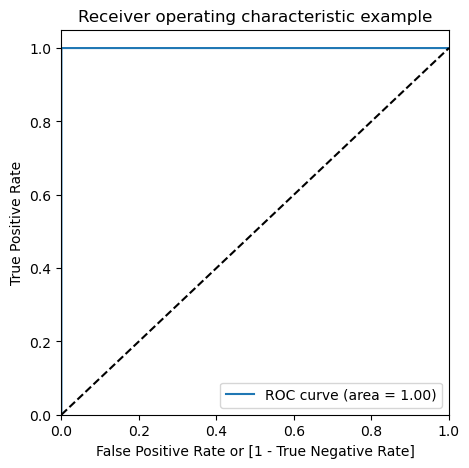

In [57]:
# Predicted probability
y_train_pred_proba = oversampled_best_xgb_model_v2.predict_proba(X_train)[:,1]
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [58]:
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation
cv_results = cross_validate(oversampled_best_xgb_model_v2, X_train, y_train, cv=N_SPLITS, scoring=scoring)

# Display average of each metric
for metric, scores in cv_results.items():
    if "test" in metric:
        print(f"{metric}: {scores.mean():.4f}")

c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:48:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Smart\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


test_accuracy: 0.9991
test_precision: 0.9983
test_recall: 0.9999
test_f1: 0.9991
test_roc_auc: 1.0000
